# EPLlish Premier League (EPL) Pythagorean Predictor

## Step 1

In [22]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load the data. 
EPL1718 = pd.read_excel('D:\GitHub\Coursera\SportsPerformanceAnalytics\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\data\EPL2017-18.xlsx')
print(EPL1718.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


## Step 2

In [25]:
EPL1718['hwinvalue']=np.where(EPL1718['FTR']=='H',1,np.where(EPL1718['FTR']=='D',.5,0))
EPL1718['awinvalue']=np.where(EPL1718['FTR']=='A',1,np.where(EPL1718['FTR']=='D',.5,0))
EPL1718['count']=1
EPL1718

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwinvalue,awinvalue,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
375,20180513,Newcastle,Chelsea,3,0,H,1.0,0.0,1
376,20180513,Southampton,Man City,0,1,A,0.0,1.0,1
377,20180513,Swansea,Stoke,1,2,A,0.0,1.0,1
378,20180513,Tottenham,Leicester,5,4,H,1.0,0.0,1


## Step 3

In [26]:
EPL17 = EPL1718[EPL1718.Date < 20180000]

EPL17h = EPL17.groupby('HomeTeam')['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL17h = EPL17h.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
EPL17h



C:\Users\mgy0003\AppData\Local\Temp\ipykernel_13984\3604048854.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  EPL17h = EPL17.groupby('HomeTeam')['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()


,team,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,10,8.5,25,10
1,Bournemouth,11,4.5,14,17
2,Brighton,10,5.5,10,12
3,Burnley,10,6.0,7,6
4,Chelsea,11,8.5,21,7
5,Crystal Palace,11,5.0,14,18
6,Everton,10,6.5,17,13
7,Huddersfield,11,6.0,10,12
8,Leicester,10,5.0,13,14
9,Liverpool,11,8.5,21,4


In [27]:
EPL17a = EPL17.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL17a = EPL17a.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
EPL17a

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_13984\1497743851.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  EPL17a = EPL17.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()


,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,11,5.0,16,13
1,Bournemouth,10,3.0,15,6
2,Brighton,11,3.0,13,5
3,Burnley,11,6.5,11,11
4,Chelsea,10,7.0,7,18
5,Crystal Palace,10,2.5,14,4
6,Everton,11,3.5,19,8
7,Huddersfield,10,3.0,20,8
8,Leicester,11,5.0,18,18
9,Liverpool,10,6.5,20,27


## Step 4 (home team)

In [28]:
# Merge the home team and away team results

EPL17 = pd.merge(EPL17h, EPL17a, on = ['team'])
EPL17

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,10,8.5,25,10,11,5.0,16,13
1,Bournemouth,11,4.5,14,17,10,3.0,15,6
2,Brighton,10,5.5,10,12,11,3.0,13,5
3,Burnley,10,6.0,7,6,11,6.5,11,11
4,Chelsea,11,8.5,21,7,10,7.0,7,18
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4
6,Everton,10,6.5,17,13,11,3.5,19,8
7,Huddersfield,11,6.0,10,12,10,3.0,20,8
8,Leicester,10,5.0,13,14,11,5.0,18,18
9,Liverpool,11,8.5,21,4,10,6.5,20,27


## Step 5 (home team)

In [29]:
EPL17['W'] = EPL17['hwinvalue']+EPL17['awinvalue']
EPL17['G'] = EPL17['Ph']+EPL17['Pa']
EPL17['GF'] = EPL17['FTHGh']+EPL17['FTAGa']
EPL17['GA'] = EPL17['FTAGh']+EPL17['FTHGa']
EPL17

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24


## Step 6 (home team)

In [30]:
# Create the win percentage and Pythagorean Expectation

EPL17['wpc_17'] = EPL17['W']/EPL17['G']
EPL17['pyth_17'] = EPL17['GF']**2/(EPL17['GF']**2 + EPL17['GA']**2)
EPL17

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc_17,pyth_17
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32,0.357143,0.280899
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25,0.404762,0.264706
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17,0.595238,0.528548
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14,0.738095,0.885847
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32,0.357143,0.240356
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32,0.476190,0.379018
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32,0.428571,0.240356
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32,0.476190,0.484131
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24,0.714286,0.800000


In [45]:
EPL18 = EPL1718[EPL1718.Date > 20180000]

EPL18h = EPL18.groupby('HomeTeam')['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL18h = EPL18h.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
EPL18h

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_13984\382741042.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  EPL18h = EPL18.groupby('HomeTeam')['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()


,team,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,9,7.5,29,10
1,Bournemouth,8,5.0,12,13
2,Brighton,9,5.5,14,13
3,Burnley,9,3.5,9,11
4,Chelsea,8,4.5,9,9
5,Crystal Palace,8,4.5,15,9
6,Everton,9,5.5,11,9
7,Huddersfield,8,2.5,6,13
8,Leicester,9,5.0,12,8
9,Liverpool,8,7.0,24,6


In [46]:
ph = EPL18['count']
ph.sum()

171

In [32]:
EPL18a = EPL18.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL18a = EPL18a.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
EPL18a

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_13984\2746524435.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  EPL18a = EPL18.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()


,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,8,1.0,15,7
1,Bournemouth,9,4.0,16,13
2,Brighton,8,1.5,16,5
3,Burnley,8,4.0,11,9
4,Chelsea,9,4.5,15,14
5,Crystal Palace,9,4.5,14,12
6,Everton,8,2.5,17,8
7,Huddersfield,9,2.5,13,4
8,Leicester,8,2.5,20,13
9,Liverpool,9,5.0,8,12


In [33]:
# Merge the home team and away team results

EPL18 = pd.merge(EPL18h, EPL18a, on = ['team'])
EPL18

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,9,7.5,29,10,8,1.0,15,7
1,Bournemouth,8,5.0,12,13,9,4.0,16,13
2,Brighton,9,5.5,14,13,8,1.5,16,5
3,Burnley,9,3.5,9,11,8,4.0,11,9
4,Chelsea,8,4.5,9,9,9,4.5,15,14
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12
6,Everton,9,5.5,11,9,8,2.5,17,8
7,Huddersfield,8,2.5,6,13,9,2.5,13,4
8,Leicester,9,5.0,12,8,8,2.5,20,13
9,Liverpool,8,7.0,24,6,9,5.0,8,12


In [34]:
EPL18['W'] = EPL18['hwinvalue']+EPL18['awinvalue']
EPL18['G'] = EPL18['Ph']+EPL18['Pa']
EPL18['GF'] = EPL18['FTHGh']+EPL18['FTAGa']
EPL18['GA'] = EPL18['FTAGh']+EPL18['FTHGa']
EPL18

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14


In [35]:
# Create the win percentage and Pythagorean Expectation

EPL18['wpc_18'] = EPL18['W']/EPL18['G']
EPL18['pyth_18'] = EPL18['GF']**2/(EPL18['GF']**2 + EPL18['GA']**2)
EPL18

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc_18,pyth_18
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22,0.441176,0.400990
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23,0.529412,0.579491
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26,0.294118,0.128866
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28,0.441176,0.443577
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14,0.705882,0.868633


In [37]:
EPL = pd.merge(EPL17, EPL18, on = ['team'])
EPL

,team,Ph_x,hwinvalue_x,FTHGh_x,FTAGh_x,Pa_x,awinvalue_x,FTHGa_x,FTAGa_x,W_x,...,Pa_y,awinvalue_y,FTHGa_y,FTAGa_y,W_y,G_y,GF_y,GA_y,wpc_18,pyth_18
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,...,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,...,9,4.0,16,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,...,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,...,8,4.0,11,9,7.5,17,18,22,0.441176,0.400990
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,...,9,4.5,15,14,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,...,9,4.5,14,12,9.0,17,27,23,0.529412,0.579491
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,...,8,2.5,17,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,...,9,2.5,13,4,5.0,17,10,26,0.294118,0.128866
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,...,8,2.5,20,13,7.5,17,25,28,0.441176,0.443577
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,...,9,5.0,8,12,12.0,17,36,14,0.705882,0.868633


## Optional steps, not required for Assessment 
### (Uncomment to run)

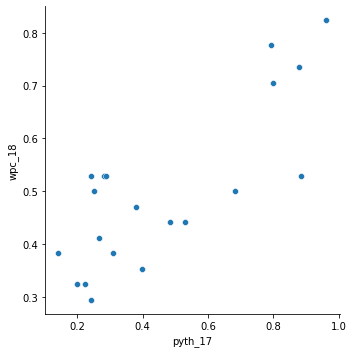

In [38]:
# Plot Pythagorean Expectation against win percentage in the second half of the season

sns.relplot(x="pyth_17", y="wpc_18", data = EPL)

In [39]:
keyvars = EPL[['team','wpc_18','wpc_17','pyth_17','pyth_18']]
keyvars.corr()

,wpc_18,wpc_17,pyth_17,pyth_18
wpc_18,1.000000,0.756573,0.795693,0.955986
wpc_17,0.756573,1.000000,0.968204,0.745832
pyth_17,0.795693,0.968204,1.000000,0.795331
pyth_18,0.955986,0.745832,0.795331,1.000000


In [ ]:
# Plot the data

#sns.relplot(x="pyth18", y="wpc18", data =EPL18)

In [ ]:
# Run the regression

#pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=EPL18).fit()
#pyth_lm.summary()

## Step 7 (=Step 4 (away team))

## Step 7 (=Step 5 (away team))

## Step 7 (=Step 6 (away team))

## Optional steps, not required for Assessment
### (Uncomment to run)

In [ ]:
# Plot the data

#sns.relplot(x="pyth18", y="wpc18", data =EPL2018)

In [ ]:
# Run the regression

#pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=EPL2018).fit()
#pyth_lm.summary()

## Step 8

## Step 9

## Optional steps, not required for Assessment
### (Uncomment to run)

In [ ]:
#sns.relplot(x="pyth18", y="wpc18", data =Half2predictor)

In [ ]:
#sns.relplot(x="wpc18", y="wpc18", data =Half2predictor)

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?